Reading 0 ... 264396  =      0.000 ...   528.792 secs...


C:\Users\lyz\AppData\Local\Temp\ipykernel_28416\1919426441.py:11: RuntimeWarning: Could not define the number of bytes automatically. Defaulting to 2.
  raw = mne.io.read_raw_cnt(cnt_file, preload=True)


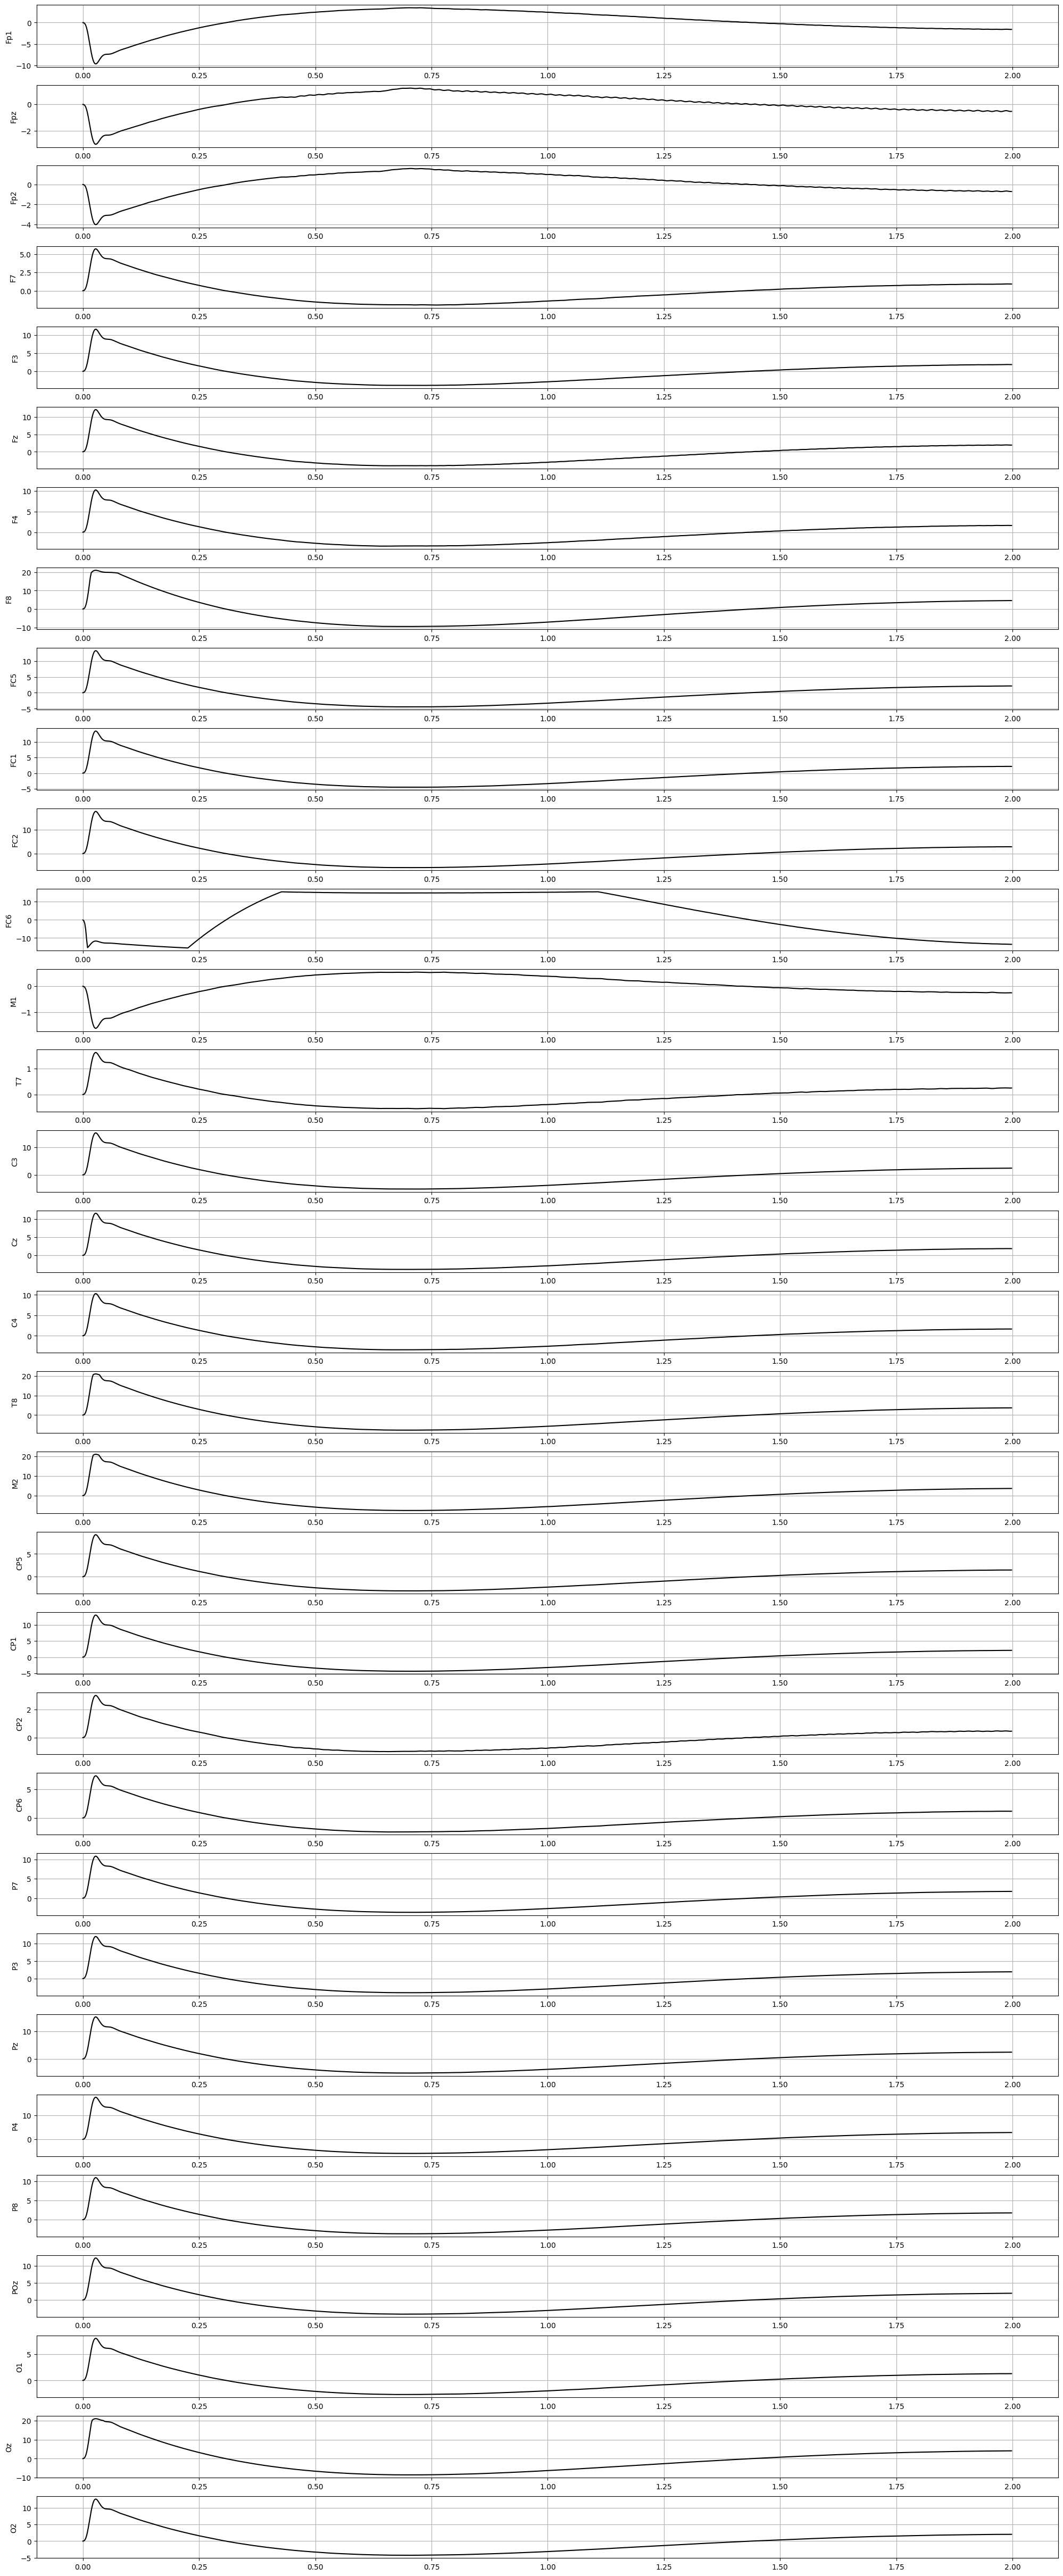

In [55]:
# 引入python库
import mne
import os
from mne.datasets import sample
import matplotlib.pyplot as plt

# 指定CNT文件路径
cnt_file = 'D:\\TVB_Distribution\\test\\DATA\\A_MI.cnt'

# 使用mne加载CNT文件
raw = mne.io.read_raw_cnt(cnt_file, preload=True)

# new_sfreq = 1024  # 新的采样率（以毫秒为单位）
# raw.resample(new_sfreq)

# 可以访问加载的数据
# print(raw.info)

time_start = 0.
time_end = 2.0
picks = mne.pick_types(raw.info, eeg=True, exclude='bads')
M1 = mne.pick_types(raw.info, eeg=True, exclude='bads', include='M1')
M2 = mne.pick_types(raw.info, eeg=True, exclude='bads', include='M2')
# 修改时间
t_idx = raw.time_as_index([time_start, time_end])
data, times = raw[picks, t_idx[0]:t_idx[1]]

# 重采样，取M1和M2为参考通道，减去两者之和的平均值
avg = data[12:13, :] + data[13:14, :]
data = data - avg/2

for i in range(0, 32, 1):
    plt.subplot(32, 1, i + 1)
    # unit is μV
    plt.plot(times, data.T[:,i:i+1]*1e3, 'k', alpha=1)
    plt.ylabel(raw.info.ch_names[i])
    plt.grid(True)

plt.subplots_adjust(left=0,
                    bottom=0,
                    right=3,
                    top=10,
                    wspace=0,
                    hspace=0.3
                   )

plt.show()